## Orthodontic Morph

In [1]:
import cv2
import numpy as np
import sys
from IPython.display import HTML
from matplotlib import pyplot as plt 
from scipy.spatial import Delaunay
import operator
import glob
from skimage import io
import os
import math
from subprocess import Popen, PIPE
from PIL import Image
import random
import subprocess
import argparse
import shutil
import dlib
import imutils

Image source : https://vancortho.com/wp-content/uploads/2016/04/angelina-jolie-before-after-braces2.jpg

In [ ]:
file1= 'angie.jpg'
imgnew = cv2.imread(file1)
height1, width1 = 800,750
crop_img1 = imgnew[0:0+height1,0:0+width1]
crop_img2 = imgnew[0:0+height1,770:770+width1]
#dst = cv2.resize(crop_img, (width, height), interpolation = cv2.INTER_CUBIC)
plt.imshow(crop_img2)
plt.show()
filename1 = 'angie_init.jpg'
cv2.imwrite(filename1, crop_img1) 
filename2 = 'angie_fin.jpg'
cv2.imwrite(filename2, crop_img2) 

In [85]:
file1='angie_init.jpg'
file2='angie_fin.jpg'

In [86]:
# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# read the image
img1 = cv2.imread("angie_init.jpg")

# Convert image into grayscale
gray1 = cv2.cvtColor(src=img1, code=cv2.COLOR_BGR2GRAY)
pts=[]
# Use detector to find landmarks
faces1 = detector(gray1)
for face in faces1:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Create landmark object
    landmarks = predictor(image=gray1, box=face)

    # Loop through all the points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pt=[x,y]
        pts.append(pt)
        # Draw a circle
        cv2.circle(img=img1, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
pts=np.array(pts)
x_corn1=img1.shape[1]
y_corn1=img1.shape[0]
pts=np.append(pts, [[0, 600], [200, 600], [500, 650], [740, 750], [380, 700], [500, 80], [5, 5],[5, y_corn1-5],[5, y_corn1//3],[5, 2*y_corn1//3], [x_corn1//2, 5],[x_corn1-5, 5],
                            [x_corn1-5, y_corn1//3],[x_corn1-5, 2*y_corn1//3], [x_corn1//2,y_corn1-5],[x_corn1-5,y_corn1-5]], axis=0 )



In [87]:
corner_points1=[]
length1=pts.shape[0]
for i in range(length1):
    corner_points1.append(pts[i])
print(len(corner_points1))

84


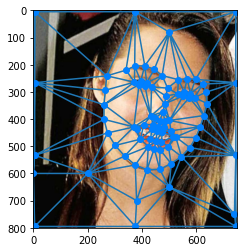

In [88]:
points1 = np.array(corner_points1)
tri1 = Delaunay(points1)
#plt.figure(figsize=(10,20))
im1 = plt.imread(file1)
implot1 = plt.imshow(im1)


plt.triplot(points1[:,0], points1[:,1], tri1.simplices)
plt.plot(points1[:,0], points1[:,1], 'o', color = (0,0.5,1))

plt.xlim(0, img1.shape[1]); plt.ylim(0, img1.shape[0])
plt.gca().invert_yaxis()

plt.show()

In [89]:
np.savetxt('test1_face.txt', corner_points1, delimiter=' ', fmt='%s')
f1 = open('test1_face.txt', 'r')
print(f1.read())
f1.close()

270 241
265 294
260 347
260 401
273 451
301 497
336 536
375 569
418 586
465 585
507 564
545 538
576 505
598 468
614 428
628 387
640 343
341 220
373 205
410 204
445 217
474 240
534 255
566 251
597 254
624 271
635 301
494 286
488 315
483 344
478 373
432 389
448 397
465 406
483 406
501 405
372 264
395 260
417 266
435 282
411 278
389 273
531 307
555 300
578 306
593 321
574 321
551 315
370 429
406 421
441 420
459 430
479 429
506 443
524 466
497 501
466 512
445 509
423 501
394 474
381 435
436 438
456 444
475 447
514 465
471 484
451 482
431 475
0 600
200 600
500 650
740 750
380 700
500 80
5 5
5 795
5 266
5 533
375 5
745 5
745 266
745 533
375 795
745 795



In [90]:
# Load the detector
detector = dlib.get_frontal_face_detector()

# Load the predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# read the image
img2 = cv2.imread("angie_fin.jpg")

# Convert image into grayscale
gray2 = cv2.cvtColor(src=img2, code=cv2.COLOR_BGR2GRAY)
pts2=[]
# Use detector to find landmarks
faces2 = detector(gray2)
for face in faces2:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point

    # Create landmark object
    landmarks = predictor(image=gray2, box=face)

    # Loop through all the points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        pt=[x,y]
        pts2.append(pt)
        # Draw a circle
        cv2.circle(img=img2, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)

pts2=np.array(pts2)
x_corn2=img2.shape[1]
y_corn2=img2.shape[0]
pts2=np.append(pts2, [[0, 680], [200, 670], [500, 720], [630, 770], [380, 720], [400, 150],[5, 5],[5, y_corn2-5],[5, y_corn2//3],[5, 2*y_corn2//3],[x_corn2//2, 5],[x_corn2-5, 5],
                            [x_corn2-5, y_corn2//3],[x_corn2-5, 2*y_corn2//3],[x_corn2//2,y_corn2-5],[x_corn2-5,y_corn2-5]], axis=0 )

print(pts2)

[[223 371]
 [231 419]
 [241 465]
 [253 511]
 [273 553]
 [309 588]
 [349 612]
 [394 629]
 [438 629]
 [476 614]
 [506 585]
 [530 552]
 [548 517]
 [557 478]
 [559 438]
 [561 397]
 [557 358]
 [271 333]
 [295 317]
 [324 312]
 [353 317]
 [382 327]
 [447 325]
 [470 312]
 [496 305]
 [521 306]
 [541 320]
 [417 357]
 [420 387]
 [422 418]
 [426 448]
 [389 466]
 [407 470]
 [426 475]
 [442 467]
 [456 459]
 [302 368]
 [321 356]
 [343 356]
 [365 369]
 [342 373]
 [321 374]
 [458 363]
 [476 349]
 [497 347]
 [516 358]
 [500 364]
 [479 365]
 [338 510]
 [370 496]
 [403 489]
 [426 491]
 [447 485]
 [474 488]
 [497 497]
 [479 535]
 [454 555]
 [431 560]
 [406 560]
 [371 545]
 [346 513]
 [404 505]
 [427 505]
 [448 501]
 [488 502]
 [451 530]
 [428 535]
 [405 535]
 [  0 680]
 [200 670]
 [500 720]
 [630 770]
 [380 720]
 [400 150]
 [  5   5]
 [  5 795]
 [  5 266]
 [  5 533]
 [375   5]
 [745   5]
 [745 266]
 [745 533]
 [375 795]
 [745 795]]


In [91]:
corner_points2=[]
length2=pts2.shape[0]
for i in range(length2):
    corner_points2.append(pts2[i])
print(len(corner_points2))

84


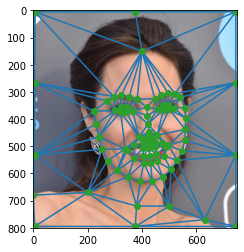

In [92]:
points2 = np.array(corner_points2)
tri2 = Delaunay(points2)

im2 = plt.imread(file2)
implot2 = plt.imshow(im2)

#plt.figure(figsize=(3,4))
plt.triplot(points2[:,0], points2[:,1], tri2.simplices)
plt.plot(points2[:,0], points2[:,1], 'o')

plt.xlim(0, img2.shape[1]); plt.ylim(0, img2.shape[0])
plt.gca().invert_yaxis()

plt.show()


In [93]:
np.savetxt('test2_face.txt', corner_points2, delimiter=' ', fmt='%s')
f2 = open('test2_face.txt', 'r')
f2.close()

In [94]:
# Read points from text file
def readPoints(path) :
    # Create an array of points.
    points = [];
    # Read points
    with open(path) as file :
        for line in file :
            x, y = line.split()
            points.append((int(x), int(y)))

    return points

In [95]:
alpha = 0.5
points1 = readPoints('test1_face.txt')
points2 = readPoints('test2_face.txt')
points = [];
    
length_p = len(points1)
# Compute weighted average point coordinates
for i in range(0, length_p):
    x = ( 1 - alpha ) * points1[i][0] + alpha * points2[i][0]
    y = ( 1 - alpha ) * points1[i][1] + alpha * points2[i][1]
    points.append((x,y))

points_del = np.array(points)
tri_del = Delaunay(points_del)
final_del=np.array(tri_del.simplices)
np.savetxt('triangle_face.txt',final_del, fmt='%s')
print(final_del)

[[74 76 68]
 [76 77 68]
 [ 0 76 74]
 [71 81 83]
 [82 71 83]
 [73 78 79]
 [70 82 72]
 [70 71 82]
 [73 18 78]
 [ 2 77 76]
 [77 69 68]
 [69 75 68]
 [69 82 75]
 [82 69 72]
 [15 80 81]
 [15 16 80]
 [16 26 80]
 [23 73 24]
 [18 17 78]
 [78 17 74]
 [17  0 74]
 [19 18 73]
 [ 2  3 77]
 [ 3 69 77]
 [69  3  4]
 [ 0  1 76]
 [ 1  2 76]
 [71 11 81]
 [70 11 71]
 [13 14 81]
 [14 15 81]
 [26 25 80]
 [80 25 79]
 [25 73 79]
 [73 25 24]
 [27 39 21]
 [15 45 16]
 [45 26 16]
 [22 21 73]
 [23 22 73]
 [22 27 21]
 [22 23 43]
 [36 17 18]
 [ 1 36  2]
 [17 36  0]
 [36  1  0]
 [21 20 73]
 [20 19 73]
 [39 31 40]
 [31 39 29]
 [58  8  7]
 [ 7  8 72]
 [ 8 70 72]
 [ 8  9 70]
 [12 13 81]
 [11 12 81]
 [11 10 55]
 [10 56 55]
 [56 10  9]
 [ 9 10 70]
 [10 11 70]
 [42 22 43]
 [22 42 27]
 [14 46 15]
 [46 45 15]
 [25 44 24]
 [44 25 26]
 [45 44 26]
 [44 23 24]
 [23 44 43]
 [46 44 45]
 [20 38 19]
 [38 39 40]
 [39 38 21]
 [38 20 21]
 [19 37 18]
 [37 36 18]
 [38 37 19]
 [37 38 40]
 [31 50 49]
 [56 65 55]
 [57  8 58]
 [57 56  9]
 [ 8

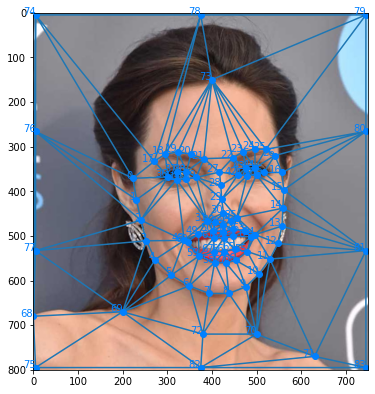

In [96]:
points2 = np.array(corner_points2)
tri2 = Delaunay(points2)

plt.figure(figsize=(6,8))
im2 = plt.imread(file2)
implot2 = plt.imshow(im2)

plt.triplot(points2[:,0], points2[:,1], tri_del.simplices)
plt.plot(points2[:,0], points2[:,1], 'o', color = (0,0.5,1))

for j, p in enumerate(points2):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right', color = (0,0.5,1)) # label the points
    
plt.xlim(0, img2.shape[1]); plt.ylim(0, img2.shape[0])
plt.gca().invert_yaxis()

#plt.savefig('rectogdel.jpg', bbox_inches='tight' )

plt.show()


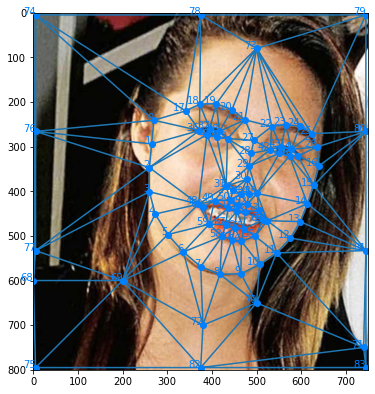

In [97]:
points1 = np.array(corner_points1)
tri1 = Delaunay(points1)
plt.figure(figsize=(6,8))
im1 = plt.imread(file1)
implot1 = plt.imshow(im1)


plt.triplot(points1[:,0], points1[:,1], tri_del.simplices)
plt.plot(points1[:,0], points1[:,1], 'o', color = (0,0.5,1))

for j, p in enumerate(points1):
    plt.text(p[0]-0.03, p[1]+0.03, j, ha='right', color = (0,0.5,1)) # label the points
    
plt.xlim(0, img1.shape[1]); plt.ylim(0, img1.shape[0])
plt.gca().invert_yaxis()

#plt.savefig('rectfindel.jpg', bbox_inches='tight' )
plt.show()



In [98]:
# Apply affine transform calculated using srcTri and dstTri to src and
# output an image of size.
def applyAffineTransform(src, srcTri, dstTri, size) :
    
    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(srcTri), np.float32(dstTri) )
    
    # Apply the Affine Transform just found to the src image
    dst = cv2.warpAffine( src, warpMat, (size[0], size[1]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    return dst



In [99]:
# Warps and alpha blends triangular regions from img1 and img2 to img
def morphTriangle(img1, img2, img, t1, t2, t, alpha) :

    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(np.float32([t1]))
    r2 = cv2.boundingRect(np.float32([t2]))
    r = cv2.boundingRect(np.float32([t]))
    
    # Offset points by left top corner of the respective rectangles
    t1Rect = []
    t2Rect = []
    tRect = []
    
    for i in range(0, 3):
        tRect.append(((t[i][0] - r[0]),(t[i][1] - r[1])))
        t1Rect.append(((t1[i][0] - r1[0]),(t1[i][1] - r1[1])))
        t2Rect.append(((t2[i][0] - r2[0]),(t2[i][1] - r2[1])))

    # Apply warpImage to small rectangular patches
    img1Rect = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]
    img2Rect = img2[r2[1]:r2[1] + r2[3], r2[0]:r2[0] + r2[2]]
    
    
    # Get mask by filling triangle
    mask = np.zeros((r[3], r[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tRect), (1.0, 1.0, 1.0), 16, 0);
    #print(mask.shape)
    
    size = (r[2], r[3])
    warpImage1 = applyAffineTransform(img1Rect, t1Rect, tRect, size)
    warpImage2 = applyAffineTransform(img2Rect, t2Rect, tRect, size)

    # Alpha blend rectangular patches
    imgRect = (1.0 - alpha) * warpImage1 + alpha * warpImage2
    #imgRect = (1.0) * warpImage1
    #imgRect = (1.0) * warpImage2
    imgRect = imgRect * mask
    
    #print(img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]].shape)
    # Copy triangular region of the rectangular patch to the output image
    img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] * (1 - mask )
    img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = img[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] + imgRect
    
    return img


In [100]:
def warpTriangle(img1, img2, tri1, tri2) :
    
    # Find bounding rectangle for each triangle
    r1 = cv2.boundingRect(tri1)
    r2 = cv2.boundingRect(tri2)
    
    # Offset points by left top corner of the respective rectangles
    tri1Cropped = []
    tri2Cropped = []
    
    for i in range(0, 3):
        tri1Cropped.append(((tri1[0][i][0] - r1[0]),(tri1[0][i][1] - r1[1])))
        tri2Cropped.append(((tri2[0][i][0] - r2[0]),(tri2[0][i][1] - r2[1])))

    # Crop input image
    img1Cropped = img1[r1[1]:r1[1] + r1[3], r1[0]:r1[0] + r1[2]]

    # Given a pair of triangles, find the affine transform.
    warpMat = cv2.getAffineTransform( np.float32(tri1Cropped), np.float32(tri2Cropped) )
    
    # Apply the Affine Transform just found to the src image
    img2Cropped = cv2.warpAffine( img1Cropped, warpMat, (r2[2], r2[3]), None, flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101 )

    # Get mask by filling triangle
    mask = np.zeros((r2[3], r2[2], 3), dtype = np.float32)
    cv2.fillConvexPoly(mask, np.int32(tri2Cropped), (1.0, 1.0, 1.0), 16, 0);

    img2Cropped = img2Cropped * mask
    
    # Copy triangular region of the rectangular patch to the output image
    #img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] * ( (1.0, 1.0, 1.0) - mask )
    
    img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] = img2[r2[1]:r2[1]+r2[3], r2[0]:r2[0]+r2[2]] + img2Cropped
    



In [101]:
if __name__ == '__main__' :
    
    img1 = cv2.imread(file1) 
    img2 = cv2.imread(file2) 
    
    # Convert Mat to float data type
    img1 = np.float32(img1)
    img2 = np.float32(img2)
    
    steps = np.linspace(0,1,11)
    #steps = np.linspace(0,1,21, endpoint=False)
    #steps = np.linspace(0,1,11)
    for alpha in steps:
        m=int(alpha*100)
        
        points1 = readPoints('test1_face.txt')
        points2 = readPoints('test2_face.txt')
        points = [];
    
    
        length_p = len(points1)
        # Compute weighted average point coordinates
        for i in range(0, length_p):
            x = int(( 1 - alpha ) * points1[i][0] + alpha * points2[i][0])
            y = int(( 1 - alpha ) * points1[i][1] + alpha * points2[i][1])
            points.append((x,y))


        # Allocate space for final output
        imgMorph = 255*np.ones(img1.shape, dtype = img1.dtype)
    
    
        # Read triangles from tri.txt
        with open("triangle_face.txt") as file :
            for line in file :
                x,y,z = line.split()
            
                x = int(x)
                y = int(y)
                z = int(z)
            
                t1 = [points1[x], points1[y], points1[z]]
                t2 = [points2[x], points2[y], points2[z]]
                t =  [points[x], points[y], points[z]]
                #Morph one triangle at a time.
                morphTriangle(img1, img2, imgMorph, t1, t2, t, alpha)
              
            
                
        # Display Result
        #cv2.imshow("Morphed Face", np.uint8(imgMorph))
        filename = 'angiemorph'+str(m).zfill(3)+'.jpg'
        cv2.imwrite(filename, imgMorph) 
        #cv2.imshow("Morphed Face1", np.uint8(imgMorph1))
        #cv2.imshow("Morphed Face2", np.uint8(imgMorph2))
        #cv2.waitKey(0)
        file.close()

In [102]:
def generate_video(): 
    image_folder = '.' # make sure to use your folder 
    video_name = 'angie-facemorph.mp4'
    os.chdir("C:\\Users\\tanya\\Desktop\\FIGHTS\\Impractical") 
      
    images = [img for img in os.listdir(image_folder) 
              if img.endswith(".jpg") and
                 img.startswith("angiemorph")]
     
    # Array images should only consider 
    # the image files ignoring others if any 
    print(images)  
  
    frame = cv2.imread(os.path.join(image_folder, images[0])) 
  
    # setting the frame width, height width 
    # the width, height of first image 
    height, width, layers = frame.shape   
  
    video = cv2.VideoWriter(video_name, 0, 15, (width, height))  
  
    # Appending the images to the video one by one 
    for image in images:  
        video.write(cv2.imread(os.path.join(image_folder, image)))  
    
    # Deallocating memories taken for window creation 
    cv2.destroyAllWindows()  
    video.release()  # releasing the video generated 
  
  
# Calling the generate_video function 
generate_video() 

['angiemorph000.jpg', 'angiemorph010.jpg', 'angiemorph020.jpg', 'angiemorph030.jpg', 'angiemorph040.jpg', 'angiemorph050.jpg', 'angiemorph060.jpg', 'angiemorph070.jpg', 'angiemorph080.jpg', 'angiemorph090.jpg', 'angiemorph100.jpg']


In [ ]:
from IPython.display import Video

Video("morthomorph.mp4", embed=True)

In [ ]:
     
# Start coordinate, here (0, 0) 
# represents the top left corner of image 
start_point1 = points1[x]
start_point2 = points1[y]
start_point3 = points1[z]

# End coordinate, here (250, 250) 
# represents the bottom right corner of image 
end_point1 = points[x]
end_point2 = points[y]
end_point3 = points[z]

# Green color in BGR 
color = (255 ,127, 0) 

# Line thickness of 1 px 
thickness = 1

# Using cv2.line() method 
# Draw a diagonal green line with thickness of 9 px 
imgMorph = cv2.arrowedLine(imgMorph, start_point1, end_point1, color, thickness) 
imgMorph = cv2.arrowedLine(imgMorph, start_point2, end_point2, color, thickness) 
imgMorph = cv2.arrowedLine(imgMorph, start_point3, end_point3, color, thickness) 